In [20]:
from fastai import *
from fastai.vision import *

In [ ]:
folder = 'brutus'
file= 'brutus.txt'

In [ ]:
folder='teddy'
file='teddy.txt'

In [ ]:
folder='black'
file='black.txt'

In [ ]:
path=Path('sample_data/toys')
dest=path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
download_images(path/file,dest,max_pics=200)

222222222222222222222222222222222

In [ ]:
classes=['brutus','teddy','black']

In [ ]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

brutus


teddy


black


In [ ]:
np.random.seed(42)
data= ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,
ds_tfms=get_transforms(),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['black', 'brutus', 'teddy']

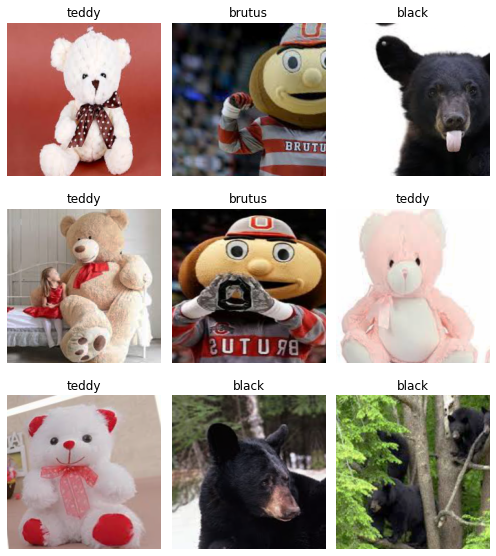

In [29]:
data.show_batch(rows=3,figsize=(7,8))

Train

In [30]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [31]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.921280,0.038682,0.016667,02:48
1,0.477658,0.016589,0.008333,02:43
2,0.322748,0.010924,0.000000,02:44
3,0.236107,0.011583,0.008333,02:47


In [32]:
learn.save('stage-1')

In [33]:
learn.unfreeze()

In [46]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


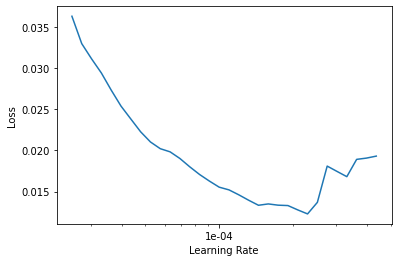

In [47]:
learn.recorder.plot()

In [38]:
interp=ClassificationInterpretation.from_learner(learn)

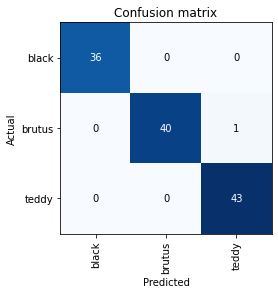

In [39]:
interp.plot_confusion_matrix()

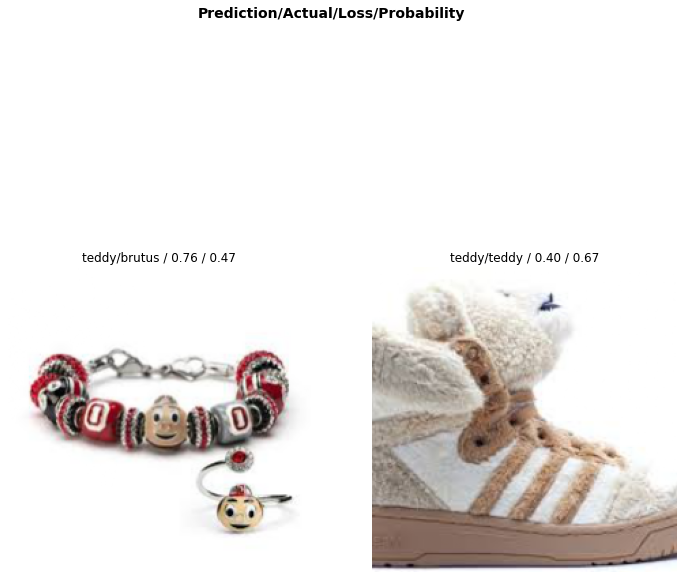

In [42]:
interp.plot_top_losses(k=2)

数据清洗

In [43]:
from fastai.widgets import *

losses,idxs=interp.top_losses()
top_loss_paths=data.valid_ds.x[idxs]

In [48]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [49]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)


In [51]:
learn_cln.load('stage-1');

In [52]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [53]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

33333333333333333333333

In [57]:
data.classes

['black', 'brutus', 'teddy']

In [58]:
learn.export()

In [55]:
defaults.device = torch.device('cpu')

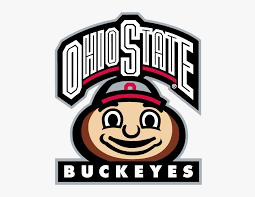

In [61]:
img = open_image(path/'brutus'/'00000021.jpg')
img

In [62]:
learn = load_learner(path)

In [63]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'brutus'